# Определение перспективного тарифа для телеком-компании

## Описание проекта

В условной компании — федерального оператора сотовой связи, клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Необходимо выполнить предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**

**Тариф «Смарт»**
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля ; 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

**Тариф «Ультра»**
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

*Примечание:*

*«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.*

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import datetime
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
df_calls = pd.read_csv('/datasets/calls.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv')

In [3]:
def review(df): 
    """Функция для отображения общей информации"""
    info = display(df.head(10)), df.info()

## Откроем файлы с данными и изучим общую информацию

### Информация о звонках

In [4]:
review(df_calls)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


**Вывод**

- в датафрейме собрана информация о звонках; 
- не наблюдаются пропущенные значения;
- значения столбца ```call_date``` привести к типу данных ```datetime```.

### Информация об интернет сессиях.

In [5]:
review(df_internet)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


**Вывод**

- в датафрейме собрана информация об интернет сессиях; 
- не наблюдаются пропущенные значения;
- значения столбца ```session_date``` привести к типу данных ```datetime```

### Информация о сообщениях.

In [6]:
review(df_messages)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


**Вывод**

- в датафрейме собрана информация о сообщениях;
- не наблюдаются пропущенные значения;
- значения столбца ```message_date``` привести к типу данных ```datetime```.

### Информация о тарифах.

In [7]:
review(df_tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


**Вывод**

- в датафрейме собрана информация о тарифах;
- не наблюдаются пропущенные значения;
- в целом с данными все в порядке.

### Информация о пользователях.

In [8]:
review(df_users)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


**Вывод**

- в датафрейме собрана информация о пользователях;
- согласно документации - ```если значение пропущено, то тариф ещё действовал на момент выгрузки данных``` будет корректно оставить пропущенные значения без изменений; 
- значения столбца ```reg_date``` привести к типу данных ```datetime```.

## Подготовим данные для дальнейшего анализа.

### Преобразуем типы данных

Приведем значения столбцов ```call_date```, ```session_date```, ```message_date```, ```reg_date``` и ```churn_date``` к типу данных ```datetime```

In [9]:
columns_to_datetime = {'call_date':df_calls,
                       'session_date':df_internet,
                       'message_date':df_messages,
                       'reg_date':df_users,
                       'churn_date':df_users
                       }

for column, frame in columns_to_datetime.items():
    frame[column] = pd.to_datetime(frame[column],format = '%Y-%m-%d')

### Сбор дополнительных данных для анализа

- количество сделанных звонков и израсходованных минут разговора по месяцам

In [10]:
df_calls['month'] = df_calls['call_date'].dt.month

- количество отправленных сообщений по месяцам

In [11]:
df_messages['month'] = df_messages['message_date'].dt.month

- объем израсходованного интернет-трафика по месяцам

In [12]:
df_internet['month'] = df_internet['session_date'].dt.month

- помесячную выручку с каждого пользователя

Создадим новый датафрейм и наполним его необходимыми данными:
- ```user_id``` - уникальный идентификатор пользователя
- ```month``` - месяц, где ```1``` - это январь, а ```12``` - декабрь. 
- ```count_calls``` - количество звонков
- ```calls_total_duration``` - общая продолжительность звонков
- ```count_messages``` - количество сообщений
- ```total_mb_used``` - количество израсходованного трафика, в мб


In [13]:
df_stat = pd.DataFrame(columns= ['user_id',
                                 'month',
                                 'count_calls',
                                 'calls_total_duration',
                                 'count_messages',
                                 'total_mb_used']
                      )

for idx in df_users['user_id']:
    for month_x in range(1,13):
        if ((month_x in df_calls.query('user_id == @idx')['month'].to_numpy()) or
            (month_x in df_messages.query('user_id == @idx')['month'].to_numpy())):
            
            count_calls = df_calls.query('user_id == @idx and month == @month_x').shape[0]
            total_duration_calls = df_calls.query('user_id == @idx and month == @month_x')['duration'].sum()
            count_messages = df_messages.query('user_id == @idx and month == @month_x').shape[0]
            total_used = df_internet.query('user_id == @idx and month == @month_x')['mb_used'].sum()
            
            df_stat = df_stat.append({'user_id':idx,
                                      'month':month_x,             
                                      'count_calls':count_calls,
                                      'calls_total_duration':total_duration_calls,
                                      'count_messages':count_messages,
                                      'total_mb_used':total_used}, 
                                     ignore_index=True
                                    )

In [14]:
review(df_stat)

,user_id,month,count_calls,calls_total_duration,count_messages,total_mb_used
0,1000.0,5.0,22.0,150.06,22.0,2253.49
1,1000.0,6.0,43.0,158.90,60.0,23233.77
2,1000.0,7.0,47.0,318.80,75.0,14003.64
3,1000.0,8.0,52.0,389.87,81.0,14055.93
4,1000.0,9.0,58.0,440.14,57.0,14568.91
5,1000.0,10.0,57.0,328.45,73.0,14702.49
6,1000.0,11.0,43.0,319.04,58.0,14756.47
7,1000.0,12.0,46.0,312.98,70.0,9817.61
8,1001.0,11.0,59.0,408.12,0.0,18429.34
9,1001.0,12.0,63.0,391.34,0.0,14036.66


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3213 entries, 0 to 3212
Data columns (total 6 columns):
user_id                 3213 non-null float64
month                   3213 non-null float64
count_calls             3213 non-null float64
calls_total_duration    3213 non-null float64
count_messages          3213 non-null float64
total_mb_used           3213 non-null float64
dtypes: float64(6)
memory usage: 150.7 KB


Приведем значения столбцов ```user_id```, ```month```, ```count_calls``` и ```count_messages``` к типу ```int```

In [16]:
for column in df_stat[['user_id','month','count_calls','count_messages']]:
    df_stat[column] = df_stat[column].astype('int')

Добавим в таблицу значение тарифа и города.

In [17]:
df_stat = df_stat.merge(df_users[['user_id','tariff']], on = 'user_id')
df_stat = df_stat.merge(df_users[['user_id','city']], on = 'user_id')

Проверяем данные.

In [18]:
review(df_stat)

,user_id,month,count_calls,calls_total_duration,count_messages,total_mb_used,tariff,city
0,1000,5,22,150.06,22,2253.49,ultra,Краснодар
1,1000,6,43,158.90,60,23233.77,ultra,Краснодар
2,1000,7,47,318.80,75,14003.64,ultra,Краснодар
3,1000,8,52,389.87,81,14055.93,ultra,Краснодар
4,1000,9,58,440.14,57,14568.91,ultra,Краснодар
5,1000,10,57,328.45,73,14702.49,ultra,Краснодар
6,1000,11,43,319.04,58,14756.47,ultra,Краснодар
7,1000,12,46,312.98,70,9817.61,ultra,Краснодар
8,1001,11,59,408.12,0,18429.34,smart,Москва
9,1001,12,63,391.34,0,14036.66,smart,Москва


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3213 entries, 0 to 3212
Data columns (total 8 columns):
user_id                 3213 non-null int64
month                   3213 non-null int64
count_calls             3213 non-null int64
calls_total_duration    3213 non-null float64
count_messages          3213 non-null int64
total_mb_used           3213 non-null float64
tariff                  3213 non-null object
city                    3213 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 225.9+ KB


Посчитаем помесячную выручку с каждого пользователя и добавим в датафрейм ```df_stat``` столбец ```revenue``` отражающий данную информацию.

In [19]:
def get_revenue(row):
    """Функция рассчитывающая помесячную выручку компании с каждого пользователя"""
    def get_extra(dict_of_param):
        """Функция рассчитывающая минуты, потраченные абонентом сверх базового пакета"""
        local_extra_min = 0
        local_extra_sms = 0
        local_extra_gb = 0
        if row['calls_total_duration'] > dict_of_param['calls_total_duration']: 
            local_extra_min = row['calls_total_duration'] - dict_of_param['calls_total_duration']
        if row['count_messages'] > dict_of_param['count_messages']:
            local_extra_sms = row['count_messages'] - dict_of_param['count_messages']
        if row['total_mb_used'] > dict_of_param['total_mb_used']:
            local_extra_gb = (row['total_mb_used'] - dict_of_param['total_mb_used'])/1024
        return local_extra_min, local_extra_sms, local_extra_gb   
    
    ultra_param = {
        'calls_total_duration':3000,
        'count_messages': 1000,
        'total_mb_used': 30 * 1024
    }
    smart_param = {
        'calls_total_duration':500,
        'count_messages': 50,
        'total_mb_used': 15 * 1024
    }
            
    if row['tariff'] == 'ultra':
        revenue = 1950
        extra_min, extra_sms, extra_gb = get_extra(ultra_param)
        revenue += extra_min + extra_sms + extra_gb * 150     
    elif row['tariff'] == 'smart':
        revenue = 550
        extra_min, extra_sms, extra_gb = get_extra(smart_param)
        revenue += 3 * extra_min + 3* extra_sms + extra_gb * 200 
    return revenue
df_stat['revenue'] = df_stat.apply(get_revenue, axis = 1).round(2)

Проверяем данные.

In [20]:
review(df_stat)

,user_id,month,count_calls,calls_total_duration,count_messages,total_mb_used,tariff,city,revenue
0,1000,5,22,150.06,22,2253.49,ultra,Краснодар,1950.00
1,1000,6,43,158.90,60,23233.77,ultra,Краснодар,1950.00
2,1000,7,47,318.80,75,14003.64,ultra,Краснодар,1950.00
3,1000,8,52,389.87,81,14055.93,ultra,Краснодар,1950.00
4,1000,9,58,440.14,57,14568.91,ultra,Краснодар,1950.00
5,1000,10,57,328.45,73,14702.49,ultra,Краснодар,1950.00
6,1000,11,43,319.04,58,14756.47,ultra,Краснодар,1950.00
7,1000,12,46,312.98,70,9817.61,ultra,Краснодар,1950.00
8,1001,11,59,408.12,0,18429.34,smart,Москва,1149.48
9,1001,12,63,391.34,0,14036.66,smart,Москва,550.00


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3213 entries, 0 to 3212
Data columns (total 9 columns):
user_id                 3213 non-null int64
month                   3213 non-null int64
count_calls             3213 non-null int64
calls_total_duration    3213 non-null float64
count_messages          3213 non-null int64
total_mb_used           3213 non-null float64
tariff                  3213 non-null object
city                    3213 non-null object
revenue                 3213 non-null float64
dtypes: float64(3), int64(4), object(2)
memory usage: 251.0+ KB


**Вывод**

На основании первичных данных был собран датафрейм со сл. информацией:
- ```user_id``` - уникальный идентификатор пользователя;
- ```month``` - месяц, где ```1``` - это январь, а ```12``` - декабрь;
- ```count_calls``` - количество звонков;
- ```calls_total_duration``` - общая продолжительность звонков;
- ```count_messages``` - количество сообщений;
- ```total_mb_used``` - количество израсходованного трафика, в мб;
- ```tariff``` - название тарифного плана;
- ```city``` - город проживание пользователя;
- ```revenue``` - помесячная выручка.

## Проанализируем данные.

Посчитаем сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Определим медиану и среднее количество, дисперсию и стандартное отклонение

In [22]:
df_stat.pivot_table(index = 'tariff', 
                    values = ['calls_total_duration',
                              'count_messages',
                              'total_mb_used'], 
                    aggfunc = ['median',
                               'mean',
                               'var',
                               'std']
                   )

median                                              mean  \
       calls_total_duration count_messages total_mb_used calls_total_duration   
tariff                                                                          
smart                397.98             28      16506.84           394.427026   
ultra                488.28             38      19311.93           497.573374   

                                                     var                 \
       count_messages total_mb_used calls_total_duration count_messages   
tariff                                                                    
smart       33.384029  16208.386990         32386.395979     796.812958   
ultra       49.413618  19488.051169         89782.393134    2285.109519   

                                      std                               
       total_mb_used calls_total_duration count_messages total_mb_used  
tariff                                                                  
smart   3.446250e+07           179.962207      28.227876   5870.476681  
ultra   1.014893e+08           299.637102      47.802819  10074.189914

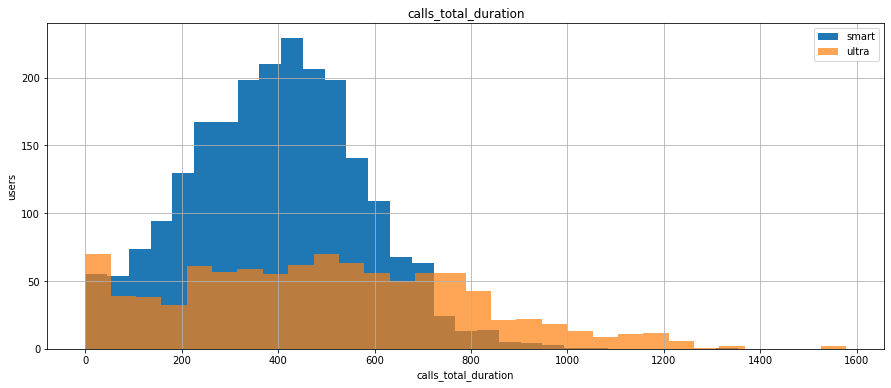

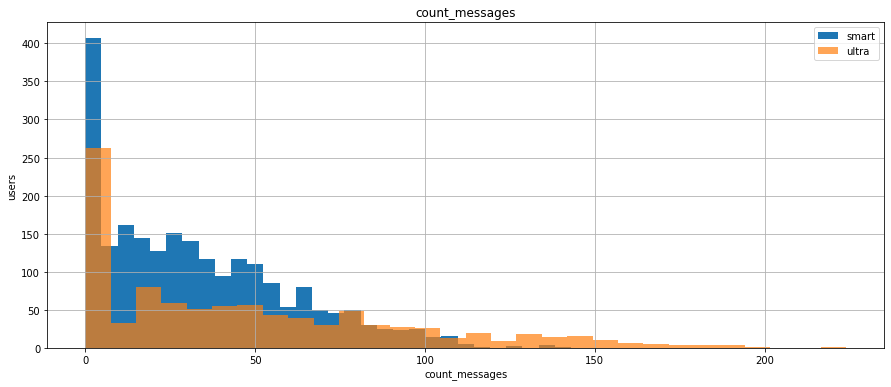

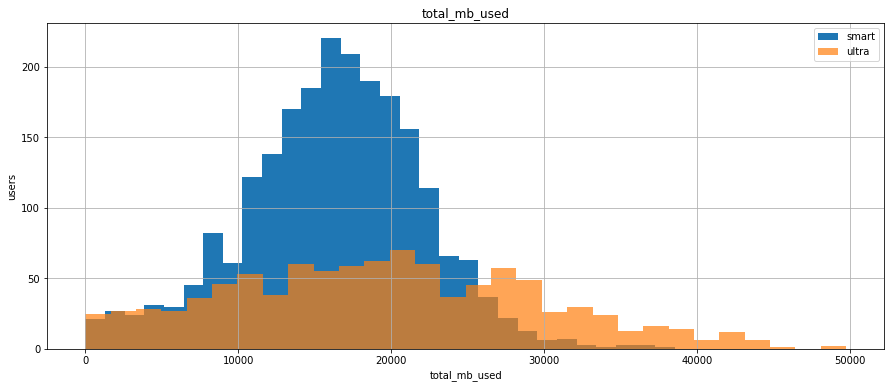

In [23]:
list_of_columns=['calls_total_duration','count_messages','total_mb_used']

tariffs = ['ultra','smart']
for column in list_of_columns:
        df_stat.loc[df_stat.loc[:,'tariff'] == 'smart'][column].plot(
            kind = 'hist',
            bins = 30,
            label = 'smart', 
            figsize = (15,6),
            grid=True
        )
        df_stat.loc[df_stat.loc[:,'tariff'] == "ultra"][column].plot(
            kind = 'hist',
            bins = 30,
            alpha =0.7,
            label = 'ultra',
            figsize = (15,6),
            grid=True
        )
        plt.title(column)
        plt.xlabel(column)
        plt.ylabel('users')
        plt.legend()
        plt.show()

Определим медиану и среднее количество для помесячной выручки и посмотрим на гистограмму распределения.

In [24]:
df_stat.pivot_table(index = 'tariff', 
                    values = 'revenue', 
                    aggfunc = ['median',
                               'mean'
                              ]
                   )

,median,mean
,revenue,revenue
tariff,,
smart,925.58,1197.628600
ultra,1950.00,2059.980528


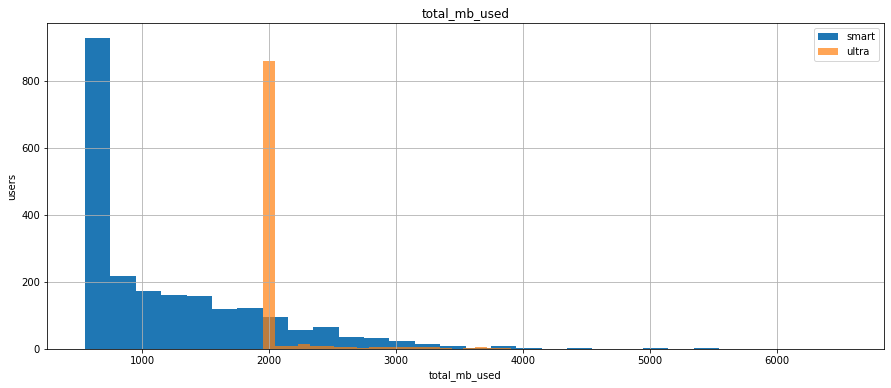

In [25]:
df_stat.loc[df_stat.loc[:,'tariff'] == 'smart']['revenue'].plot(
    kind = 'hist',
    bins = 30,
    label = 'smart', 
    figsize = (15,6),
    grid=True
)
df_stat.loc[df_stat.loc[:,'tariff'] == "ultra"]['revenue'].plot(
    kind = 'hist',
    bins = 30,
    alpha =0.7,
    label = 'ultra',
    figsize = (15,6),
    grid=True
)
plt.title(column)
plt.xlabel(column)
plt.ylabel('users')
plt.legend()
plt.show()

**Вывод**

- у тарифа ```Ультра``` наборы данных скошены вправо;
- у тарифа ```Смарт``` - наборы данных по общей продолжительности звонков - ```calls_total_duration``` и по количеству израсходованного трафика - ```total_mb_used``` - влево. Это так же подтверждают данные медианы и среднего, приведенные в сводной таблице - значения медианы в тарифе ```Смарт``` по столбцам ```calls_total_duration``` и ```total_mb_used``` выше среднего, следовательно наборы данных скошены влево;
- в тарифе ```Смарт``` чаще уходят за рамки тарифного пакета;
- в тарифе ```Ультра``` медианные и средние значения выше, чем в тарифе ```Смарт```, следовательно данных тариф приносит больше выручки.

## Проверим гипотезы.

### Первая гипотеза

- средняя выручка пользователей тарифов ```Ультра``` и ```Смарт``` различаются.

Гипотеза о равенстве средних двух генеральных совокупностей, следовательно:

**Нулевая гипотеза:** средняя выручка пользователей тарифов ```Ультра``` и ```Смарт``` равны.

**Альтернативная гипотеза:** средняя выручка пользователей тарифов ```Ультра``` и ```Смарт``` различается.

Проверим нулевую гипотезу.

In [22]:
alpha = .05
revenue_ultra = df_stat.loc[df_stat.loc[:,'tariff'] == 'ultra']['revenue']
revenue_smart = df_stat.loc[df_stat.loc[:,'tariff'] == 'smart']['revenue']
result = st.ttest_ind(revenue_ultra, revenue_smart)
prob = result.pvalue
print('p-значение:', prob)
if prob < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось нулевую гипотезу")
    

p-значение: 2.9216933424115963e-213
Отвергаем нулевую гипотезу


**Вывод**

Очень низкое p-значение/значение вероятности - средняя выручка пользователей тарифов Ультра и Смарт различается - **отвергаем нулевую гипотезу**.

### Гипотеза №2

- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Следовательно:

**Нулевая гипотеза:** средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.

**Альтернативная гипотеза:** средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Проверим нулевую гипотезу.

In [26]:
alpha = .05
city_moscow = df_stat.loc[df_stat.loc[:,'city'] == 'Москва']['revenue']
city_other = df_stat.loc[df_stat.loc[:,'city'] != 'Москва']['revenue']
result_city = st.ttest_ind(city_moscow, city_other) 
prob_city = result_city.pvalue
print('p-значение:', prob_city)
if prob_city < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.4248270909723967
Не получилось отвергнуть нулевую гипотезу


**Вывод**

Высокое p-значение/значение вероятности - cредняя выручка пользователей из Москвы близка к равной выручке пользователей из других регионов - **не получилось отвергнуть нулевую гипотезу**.

## Общий вывод.

- в целом данные приходят без артефактов и достаточно чистые.
- на основании медианных и среднех значение выручки можно сделать вывод что тариф ```Ультра``` приносит в сумме большую выручку.
- средняя выручка пользователей тарифов ```Ультра``` и ```Смарт``` не может быть равной.
- средняя выручка пользователей из Москвы близка к равной выручке пользователей из других регионов.
- рекламный бюджет выгоднее всего перераспределить в пользу тарифа ```Ультра```, несмотря на то, что его пользователи меньше выходят за рамки тарифного пакета, в отличие от абонентов тарифа ```Смарт```. 
